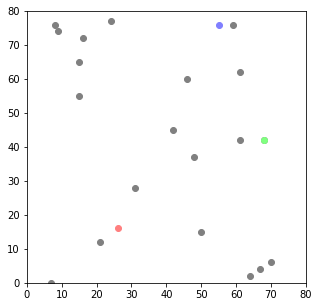

In [249]:
## inisialisasi

# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# data baru dengan cara random
jumlahData = 20

def dataRandom():
    x = []
    y = []
    for i in range(jumlahData):
        x.append(np.random.randint(0, 80))
        y.append(np.random.randint(0, 80))
    return x,y

x,y = dataRandom()

data = pd.DataFrame({
    'x': x,
    'y': y
})

# data awal
"""
data = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 49, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})
"""

np.random.seed(200)
k = 3
# centroids[i] [x,y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}

fig = plt.figure(figsize=(5, 5))
plt.scatter(data['x'], data['y'], color='#808080')
warna = {1: '#ff7f7f', 2: '#80ff80', 3: '#807fff'}

def buatPlot():
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=warna[i])
    plt.xlim(0,80)
    plt.ylim(0,80)
    plt.show()
    
buatPlot()
## Alfath Noverio
## 1301174449
## SIDE GAB 01

    x   y  Jarak dari 1  Jarak dari 2  Jarak dari 3  dekat    color
0  21  12      6.403124     55.758407     72.470684      1  #ff7f7f
1  42  45     33.120990     26.172505     33.615473      2  #80ff80
2  15  55     40.521599     54.571055     45.177428      1  #ff7f7f
3  50  15     24.020824     32.449961     61.204575      1  #ff7f7f
4  61  42     43.600459      7.000000     34.525353      2  #80ff80


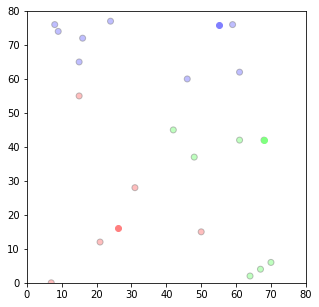

In [251]:
## pembagian

def assignment(data, centroids):
    for i in centroids.keys():
        # rumus = sqrt((x1 - x2) - (y1 - y2)^2)
        data['Jarak dari {}'.format(i)] = (
            np.sqrt(
                (data['x'] - centroids[i][0]) ** 2
                + (data['y'] - centroids[i][1]) ** 2
            )
        )
    jarakCentroid = ['Jarak dari {}'.format(i) for i in centroids.keys()]
    data['dekat'] = data.loc[:, jarakCentroid].idxmin(axis=1)
    data['dekat'] = data['dekat'].map(lambda x: int(x.lstrip('Jarak dari')))
    data['color'] = data['dekat'].map(lambda x: warna[x])
    return data

data = assignment(data,centroids)
print(data.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(data['x'], data['y'], color=data['color'], alpha=0.5, edgecolor='#808080')

buatPlot()
## Alfath Noverio
## 1301174449
## SIDE GAB 01

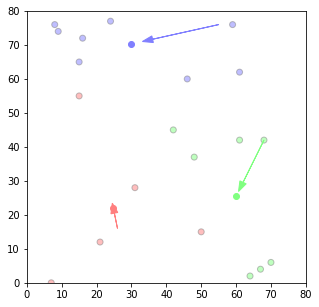

In [252]:
## ubah centroids

import copy

centroidsLama = copy.deepcopy(centroids)

def ubah(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(data[data['dekat'] == i]['x'])
        centroids[i][1] = np.mean(data[data['dekat'] == i]['y'])
    return k

centroids = ubah(centroids)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(data['x'], data['y'], color=data['color'], alpha=0.5, edgecolor='#808080')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=warna[i])
plt.xlim(0,80)
plt.ylim(0,80)
for i in centroidsLama.keys():
    xLama = centroidsLama[i][0]
    yLama = centroidsLama[i][1]
    dx = (centroids[i][0] - centroidsLama[i][0]) * 0.75
    dy = (centroids[i][1] - centroidsLama[i][1]) * 0.75
    ax.arrow(xLama, yLama, dx, dy, head_width=2, head_length=3, fc=warna[i], ec=warna[i])
plt.show()
## Alfath Noverio
## 1301174449
## SIDE GAB 01

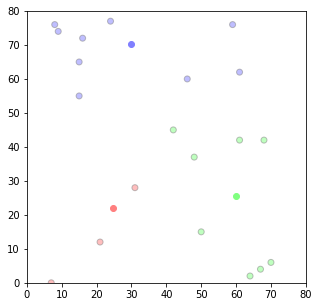

In [253]:
## looping perubahan

data = assignment(data, centroids)

# hasil
fig = plt.figure(figsize=(5, 5))
plt.scatter(data['x'], data['y'], color=data['color'], alpha=0.5, edgecolor='#808080')

buatPlot()
## Alfath Noverio
## 1301174449
## SIDE GAB 01

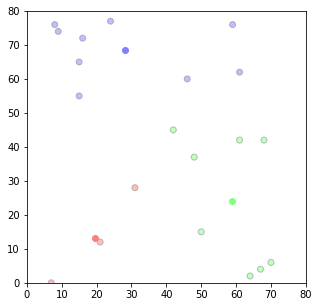

In [254]:
# mencari nilai centroids hingga tidak ada perubahan

while True:
    centroidsTerdekat = data['dekat'].copy(deep=True)
    centroids = ubah(centroids)
    data = assignment(data,centroids)
    if centroidsTerdekat.equals(data['dekat']):
        break
        
fig = plt.figure(figsize=(5, 5))
plt.scatter(data['x'], data['y'], color=data['color'], alpha=0.5, edgecolor='#808080')

buatPlot()
## Alfath Noverio
## 1301174449
## SIDE GAB 01

In [255]:
data = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 49, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
## Alfath Noverio
## 1301174449
## SIDE GAB 01

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [256]:
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_
## Alfath Noverio
## 1301174449
## SIDE GAB 01